<a href="https://colab.research.google.com/github/sdtalaviya/masters_research/blob/master/All_Embeddings_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading & Installing Prerequisites

In [ ]:
!pip install bert-embedding

     |████████████████████████████████| 29.6MB 100kB/s 
     |████████████████████████████████| 13.8MB 231kB/s 
     |████████████████████████████████| 215kB 56.7MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.6.0-cp37-none-any.whl size=259918 sha256=d2f1a5f34f7a678ca2319c60d241bcec0917f2a207c4a3ffbac1a487456558ab
  Stored in directory: /root/.cache/pip/wheels/ff/48/ac/a77c79aa416ba6dd7bf487f2280b0471034f66141617965914
Successfully built gluonnlp
ERROR: xarray 0.18.0 has requirement numpy>=1.17, but you'll have numpy 1.14.6 which is incompatible.
ERROR: tifffile 2021.4.8 has requirement numpy>=1.15.1, but you'll have numpy 1.14.6 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.14.6 which is incompatible.
ERROR: spacy 2.2.4 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
ERROR: seaborn 0.11.1 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
ERROR: pymc3 3.11.2

In [ ]:
!pip install mxnet-100cu

ERROR: Could not find a version that satisfies the requirement mxnet-100cu (from versions: none)
ERROR: No matching distribution found for mxnet-100cu


In [ ]:
!pip install sentence-transformers

     |████████████████████████████████| 81kB 8.6MB/s 
     |████████████████████████████████| 2.3MB 33.8MB/s 
     |████████████████████████████████| 1.2MB 51.6MB/s 
     |████████████████████████████████| 3.3MB 52.6MB/s 
     |████████████████████████████████| 901kB 45.4MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-1.1.1-cp37-none-any.whl size=123338 sha256=1afca6fd06b28fe3980135a0259c4ea7360ac461dc945b838a3e85fb11108e9c
  Stored in directory: /root/.cache/pip/wheels/5e/89/29/45e45adc162b50f97f71801e8b07947c9cfe2b3ae7dbf37896
Successfully built sentence-transformers
ERROR: transformers 4.6.1 has requirement numpy>=1.17, but you'll have numpy 1.14.6 which is incompatible.


In [ ]:
!ls

sample_data


# Required Packages

In [ ]:
import os
import random
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from nltk.tag import pos_tag
import re
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import itertools
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
# !pip install numpy==1.20.0
!pip install mxnet-cu100

     |████████████████████████████████| 352.6MB 17kB/s 
     |████████████████████████████████| 15.3MB 211kB/s 
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: mxnet 1.4.0 has requirement numpy<1.15.0,>=1.8.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: bert-embedding 1.0.1 has requirement numpy==1.14.6, but you'll have numpy 1.20.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6


In [ ]:
import mxnet as mx
from bert_embedding import BertEmbedding
from sentence_transformers import SentenceTransformer
import gensim 
from gensim.models import Word2Vec 

# Loading DataSet


> Dataset has been divided evenly into a training set and a test set. Moreover, each set contains 12.5K positive and 12.5K negative reviews. The training and test data were loaded as a Pandas data frames.



In [ ]:
def loadDataset(data_dir):
    
    data = {}
    for partition in ["train", "test"]:
        data[partition] = []
        for sentiment in ["neg", "pos"]:
            lable = 1 if sentiment == "pos" else 0

            path = os.path.join(data_dir, partition, sentiment)
            files = os.listdir(path)
            for f_name in files:
                with open(os.path.join(path, f_name), "r") as f:
                    review = f.read()
                    data[partition].append([review, lable])

    random.seed(4) # to comparision purpose
    random.shuffle(data["train"])
    random.shuffle(data["test"])
    
    data["train"] = pd.DataFrame(data["train"],
                                 columns=['text', 'sentiment'])
    data["test"] = pd.DataFrame(data["test"],
                                columns=['text', 'sentiment'])

    return data["train"], data["test"]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = "/content/drive/MyDrive/sentiment_analysis/IMDB_Dataset.csv"
# train_data, test_data = loadDataset(data_dir)
df = pd.read_csv(data_dir)


train_data = df [:40000]
test_data = df[40000:]

Here are the first 5 rows of the training data:

In [ ]:
# Debugging
train_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Cleaning Dataset
> Since this dataset scraped from the web, some HTML codes got mixed up with it. So, cleaning up these texts by removing HTML tags is required. Removing numbers, punctuations, and stop words, replacing negative contraction verb with whose complete forms like won't, splitting compound nouns that are made with hyphen like state-of-the-art (EXCEPT BERT), and normalizing texts by lowering them would be beneficial.

> To remove stop words, the NLTK stop words set have been used. But, some words which have a negative meaning, such as not or nor, have been removed from the set and some contraction patterns like 're or 'm have been added to stop words set. This custom Stop Word was applied for Word2Vec vectorization.

> Due to BERT embedding was trained on Wikipedia data, for this case we allow numbers and some of the punctuations like [, / () : ; '] and compound nouns that are made with hyphen which may cause a more reliable embedding to remain in the text. Moreover, we save !,?, and . to detect the end of the sentence for a later purpose (generate BERT according to each sentence).

> Stemming and lemmatization according to POS tags of words are used for BOW and TF-IDF embeddings.

> Finally, we have replaced white spaces with only one space.


In [ ]:
def NormalizeWithPOS(text):
    # Lemmatization & Stemming according to POS tagging

    word_list = word_tokenize(text)
    rev = []
    lemmatizer = WordNetLemmatizer() 
    stemmer = PorterStemmer() 
    for word, tag in pos_tag(word_list):
        if tag.startswith('J'):
            w = lemmatizer.lemmatize(word, pos='a')
        elif tag.startswith('V'):
            w = lemmatizer.lemmatize(word, pos='v')
        elif tag.startswith('N'):
            w = lemmatizer.lemmatize(word, pos='n')
        elif tag.startswith('R'):
            w = lemmatizer.lemmatize(word, pos='r')
        else:
            w = word
        w = stemmer.stem(w)
        rev.append(w)
    review = ' '.join(rev)
    return review

In [ ]:
def cleanText(text):
    
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'re", " are", text)

    if embedding is not 'BERT':
        text = re.sub(r"[0-9]+", ' ', text)
        text = re.sub(r"-", ' ', text)
    
    
    text = text.strip().lower()
    
    if embedding is 'WORD2VEC_NO_STOP':
        # Remove Stop words
        default_stop_words = set(stopwords.words('english'))
        default_stop_words.difference_update({'no', 'not', 'nor', 'too', 'any'})
        stop_words = default_stop_words.union({"'m", "n't", "'d", "'re", "'s",
                                               'would','must',"'ve","'ll",'may'})
    
        word_list = word_tokenize(text)
        filtered_list = [w for w in word_list if not w in stop_words]
        text = ' '.join(filtered_list)
    
    if embedding is not 'BERT':
        # Remove other contractions
        text = re.sub(r"'", ' ', text)
    
    # Replace punctuations with space
    if embedding is 'BERT': # save ! ? . for end of the sentence detection [,/():;']
        filters='"#$%&*+<=>@[\\]^_`{|}~\t\n'
        text = re.sub(r'\!+', '!', text)
        text = re.sub(r'\?+', '?', text)
    else:
        filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((i, " ") for i in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    
    if embedding is 'BERT':
        text = re.sub(r'\( *\)', ' ', text)

    if embedding is not 'BERT':
        text = ' '.join([w for w in text.split() if len(w)>1])

    # Replace multiple space with one space
    text = re.sub(' +', ' ', text)
    
    text = ''.join(text)

    return text

### Adding cleaned reviews as a column in our data frame.

> As mentioned before, we distinguish between embedding approaches in data cleaning. So we added 'clean_text', 'clean_text_normalized', 'clean_text_w2v_no_stop', 'clean_text_bert' columns in our data frame that each column is a cleaned data and prepared for a specific word embedding.

In [ ]:
embedding = ''
# for Word2Vec with stop words
train_data['clean_text'] = train_data['review'].apply(cleanText)
test_data['clean_text'] = test_data['review'].apply(cleanText)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# for BOW and TFIDF(s)
train_data['clean_text_normalized'] = train_data['clean_text'].apply(NormalizeWithPOS)
test_data['clean_text_normalized'] = test_data['clean_text'].apply(NormalizeWithPOS)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Low Frequency Words of Train Data - just for TFIDF

> Find words that have been repeated less than 5 times in the entire dataset.

In [ ]:
freq_train = pd.Series(' '.join(train_data['clean_text_normalized']).split()).value_counts()
less_five_freq_train = freq_train[(freq_train <5)]
print(less_five_freq_train)

sverak        4
dehydr        4
reorgan       4
spiffi        4
lecarré       4
             ..
gruschenka    1
comiccon      1
eijanaika     1
repet         1
yecchi        1
Length: 39268, dtype: int64


### Low Frequency Words of Test Data - just for BOW & TFIDF

In [ ]:
freq_test = pd.Series(' '.join(test_data['clean_text_normalized']).split()).value_counts()
less_five_freq_test = freq_test[(freq_test <5)]
print(less_five_freq_test)

higher    4
debas     4
taelon    4
lagaan    4
holler    4
         ..
leggag    1
cumul     1
scobi     1
nusrat    1
doobi     1
Length: 22114, dtype: int64


### Remove words with frequency less than 5  - just for TFIDF

> This effectively decreases the dimensions of TF-IDF vector.

In [ ]:
train_data['clean_text_normalized'] = train_data['clean_text_normalized'].apply(lambda x: ' '.join(x for x in x.split() if x not in less_five_freq_train))
test_data['clean_text_normalized'] = test_data['clean_text_normalized'].apply(lambda x: ' '.join(x for x in x.split() if x not in less_five_freq_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Continue to add cleaned reviews as a column in our data frame:

In [ ]:
embedding = 'WORD2VEC_NO_STOP'
# for Word2Vec without stop words
train_data['clean_text_w2v_no_stop'] = train_data['review'].apply(cleanText)
test_data['clean_text_w2v_no_stop'] = test_data['review'].apply(cleanText)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
embedding = 'BERT'
# for BERT(s)
train_data['clean_text_bert'] = train_data['review'].apply(cleanText)
test_data['clean_text_bert'] = test_data['review'].apply(cleanText)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### A visual comparison of different cleaned data

In [ ]:
# Debugging
print("A review example of dataset before cleaning:", end="\n\n")
print(train_data.iloc[3]['review'], end='\n\n')

print("clean_text:")
print(train_data.iloc[3]['clean_text'], end="\n\n")

print("clean_text_normalized:")
print(train_data.iloc[3]['clean_text_normalized'], end="\n\n")

print("clean_text_w2v_no_stop:")
print(train_data.iloc[3]['clean_text_w2v_no_stop'], end="\n\n")

print("clean_text_bert:")
print(train_data.iloc[3]['clean_text_bert'], end="\n\n")

A review example of dataset before cleaning:

Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.

clean_text:
basically there family where little boy jake thinks there zombie in his closet his parents are fighting all the time this movie is slower than soap opera and suddenly jake decides to become ra

# Vectorization

> To introduce our data to our classifiers except for Decision Tree, we need to convert each review to numeric features: this is vectorization.

<b>Bag Of Words (BOW):</b>
>  In this approach, we make a list of all the unique words in training data called the vocabulary. then, given an input text, we create a fixed numerical vector that counts each word of the vocabulary.

> To use BOW vectorization in Python, we can use the CountVectorizer function from the scikit-learn library. We pass NLTK stop words and our custom clean text function to remove useless words of training data thereby reducing the size of the BOW vectors until 19368.

<b>TFIDF:</b>
> The tf–idf is the product of two statistics, term frequency and inverse document frequency.

> $W_{x,y} = tf_{x,y} \times \log(\frac{N}{df_x})$

> $tf_{x,y} =$ frequency of x in y

> $df_x =$ number of documents containing x

> $N =$ total number of documents


> Despite the simplicity and low time complexity, BOW and TF-IDF have two major drawbacks. First, as the size of the data and the number of unique words in the training text increases, their length of vectors becomes much larger. Moreover, in these two approaches, only words and their repetitions are important and the order of the words in the text will not be considered in the model.
Hence, we have considered both Word2Vec and BERT embedding approaches to our experiments.


<b>Word2Vec</b>
>  Word2Vec consists of two models which are shallow two layer neural networks having one input layer, one hidden layer and one output layer. Word2Vec utilizes two architectures: Continuous Bag of Words and Skip Gram.
The basic idea of Word2Vec is words that occur in similar context tend to be closer to each other in vector space. <a href="https://pypi.org/project/gensim/">gensim</a> library is used to generate word vectors in Python.

<a href="https://arxiv.org/abs/1810.04805">BERT</a> <b>(Bidirectional Encoder Representations  from Transformers):</b>
> BERT, published by Google, is pre-trained language model word representation which transforms each word into a vector with a fixed size of 768.</br>

> In this project, we used BERT embedding twice and report their results independently. once, we tokenized each training data into words, then compute BERT embedding of each word, and finally, mean all the BERT vectors of the words as a review representation.
In a second way, we tokenized each training data into sentences and computed the mean of BERT embedding of the sentences to present each training data.

> To utilize BERT embedding  for two mentioned purposes, we have used these two libraries respectively: </br>
<a href= "https://pypi.org/project/bert-embedding/">bert-embedding 1.0.1</a> </br>
<a href= "https://github.com/UKPLab/sentence-transformers">Sentence Transformers</a>

In [ ]:
def mean(z): # used for BERT (word version) and Word2Vec
    return sum(itertools.chain(z))/len(z)

# TF-IDF

> With Stop Words



In [ ]:
embedding = 'TFIDF_WITH_STOP'
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=20000)

tfidf_with_stop_training_features = vectorizer.fit_transform(train_data["clean_text_normalized"])    
tfidf_with_stop_test_features = vectorizer.transform(test_data["clean_text_normalized"])

print(tfidf_with_stop_training_features.shape)

(40000, 20000)


In [ ]:
import pickle
file = open('/content/drive/MyDrive/sentiment_analysis/tfidf_with_stop_training_features.txt', 'wb')
pickle.dump(tfidf_with_stop_training_features, file)
file.close()

file = open('/content/drive/MyDrive/sentiment_analysis/tfidf_with_stop_test_features.txt', 'wb')
pickle.dump(tfidf_with_stop_test_features, file)
file.close()

# TF-IDF

> Without Stop Words



In [ ]:
embedding = 'TFIDF_NO_STOP'
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=20000)

tfidf_no_stop_training_features = vectorizer.fit_transform(train_data["clean_text_normalized"])    
tfidf_no_stop_test_features = vectorizer.transform(test_data["clean_text_normalized"])

print(tfidf_no_stop_training_features.shape)

(40000, 20000)


In [ ]:
import pickle
file = open('/content/drive/MyDrive/sentiment_analysis/tfidf_no_stop_training_features.txt', 'wb')
pickle.dump(tfidf_no_stop_training_features, file)
file.close()

file = open('/content/drive/MyDrive/sentiment_analysis/tfidf_no_stop_test_features.txt', 'wb')
pickle.dump(tfidf_no_stop_test_features, file)
file.close()

# WORD2VEC

> In this experiment, we use two types of data to construct word2vec vectors. once, normal data and data by removing their stop words.

> For the test data, first, we check that the word already exists in the vocabulary. Otherwise, we skip that word. 
Finally, we use mean operator overall word vectors that are also of fixed length and use just a vector to represent the review.

In [ ]:
def embeddToWord2Vec(text):
    words = word_tokenize(text)
    
    if embedding is 'WORD2VEC_WITH_STOP':
        result = [w2v_with_stop_model.wv[w] for w in words if w in w2v_with_stop_model.wv.vocab]
    else:
        result = [w2v_no_stop_model.wv[w] for w in words if w in w2v_no_stop_model.wv.vocab]
    
    feature = [mean(x) for x in zip(*result)]
    return feature

In [ ]:
def wordTokenize(text):
  return word_tokenize(text)

### Word2Vec

> With Stop Words



In [ ]:
embedding = 'WORD2VEC_WITH_STOP'

In [ ]:
words = train_data['clean_text'].apply(wordTokenize)
w2v_with_stop_model = gensim.models.Word2Vec(words, min_count = 2, size = 100, window = 5) 

In [ ]:
word2vec_with_stop_training_features = train_data['clean_text'].apply(embeddToWord2Vec)
word2vec_with_stop_test_features = test_data['clean_text'].apply(embeddToWord2Vec)

In [ ]:
feature = [x for x in word2vec_with_stop_training_features.transpose()]
word2vec_with_stop_training_features = np.asarray(feature)

feature = [x for x in word2vec_with_stop_test_features.transpose()]
word2vec_with_stop_test_features = np.asarray(feature)

print(word2vec_with_stop_training_features.shape)

(40000, 100)


In [ ]:
import pickle
file = open('/content/drive/MyDrive/sentiment_analysis/word2vec_with_stop_training_features.txt', 'wb')
pickle.dump(word2vec_with_stop_training_features, file)
file.close()

file = open('/content/drive/MyDrive/sentiment_analysis/word2vec_with_stop_test_features.txt', 'wb')
pickle.dump(word2vec_with_stop_test_features, file)
file.close()

### Word2Vec

> Without Stop Words



In [ ]:
embedding = 'WORD2VEC_NO_STOP'

In [ ]:
words = train_data['clean_text_w2v_no_stop'].apply(wordTokenize)
w2v_no_stop_model = gensim.models.Word2Vec(words, min_count = 2, size = 100, window = 5) 

In [ ]:
word2vec_no_stop_training_features = train_data['clean_text_w2v_no_stop'].apply(embeddToWord2Vec)
word2vec_no_stop_test_features = test_data['clean_text_w2v_no_stop'].apply(embeddToWord2Vec)

In [ ]:
word2vec_no_stop_test_features

In [ ]:
feature = [x for x in word2vec_no_stop_training_features.transpose()]
word2vec_no_stop_training_features = np.asarray(feature)

feature = [x for x in word2vec_no_stop_test_features.transpose()]
word2vec_no_stop_test_features = np.asarray(feature)

print(word2vec_no_stop_training_features.shape)

In [ ]:
import pickle
file = open('/content/drive/MyDrive/sentiment_analysis/word2vec_no_stop_training_features.txt', 'wb')
pickle.dump(word2vec_no_stop_training_features, file)
file.close()

file = open('/content/drive/MyDrive/sentiment_analysis/word2vec_no_stop_test_features.txt', 'wb')
pickle.dump(word2vec_no_stop_test_features, file)
file.close()

# BERT

As we mentioned before, we used BERT embedding twice and report their results independently. once, we tokenized each training data into words, then compute BERT embedding of each word, and finally, mean all the BERT vectors of the words as a review representation. In a second way, we tokenized each training data into sentences and computed the mean of BERT embedding of the sentences to present each training data.

In [ ]:
# Cleaning before BERT
embedding = 'BERT'

### (BERT)
> Word Tokenization Version



In [ ]:
def embeddToBERT(text):
    sentences = re.split('!|\?|\.',text)
    sentences = list(filter(None, sentences)) 

    if bert_version == 'WORD':
        result = bert(sentences, 'avg') # avg is refer to handle OOV
    
        bert_vocabs_of_sentence = []
        for sentence in range(len(result)):
            for word in range(len(result[sentence][1])):
                bert_vocabs_of_sentence.append(result[sentence][1][word])
        feature = [mean(x) for x in zip(*bert_vocabs_of_sentence)]

    elif bert_version == 'SENTENCE':
        result = bert_transformers.encode(sentences)
        feature = [mean(x) for x in zip(*result)]
  
    return feature

In [ ]:
# !pip install mxnet-cu92

To take advantage of GPU:

In [ ]:
ctx = mx.gpu(0)
# bert = BertEmbedding(ctx=ctx)
bert = BertEmbedding()

Vocab file is not found. Downloading.


In [ ]:
from bert_embedding import BertEmbedding

bert_abstract = """We introduce a new language representation model called BERT, which stands for Bidirectional Encoder Representations from Transformers.
 Unlike recent language representation models, BERT is designed to pre-train deep bidirectional representations by jointly conditioning on both left and right context in all layers.
 As a result, the pre-trained BERT representations can be fine-tuned with just one additional output layer to create state-of-the-art models for a wide range of tasks, such as question answering and language inference, without substantial task-specific architecture modifications. 
BERT is conceptually simple and empirically powerful. 
It obtains new state-of-the-art results on eleven natural language processing tasks, including pushing the GLUE benchmark to 80.4% (7.6% absolute improvement), MultiNLI accuracy to 86.7 (5.6% absolute improvement) and the SQuAD v1.1 question answering Test F1 to 93.2 (1.5% absolute improvement), outperforming human performance by 2.0%."""
sentences = bert_abstract.split('\n')
result = bert(sentences)

In [ ]:
# bert_transformers = SentenceTransformer('bert-base-nli-mean-tokens')

In [ ]:
# bert_version = 'WORD'
# bert_word_training_features = train_data['clean_text_bert'].apply(embeddToBERT)
# bert_word_test_features = test_data['clean_text_bert'].apply(embeddToBERT)

In [ ]:
# feature = [x for x in bert_word_training_features.transpose()]
# bert_word_training_features = np.asarray(feature)

# feature = [x for x in bert_word_test_features.transpose()]
# bert_word_test_features = np.asarray(feature)

# print(bert_word_training_features.shape)

### (BERT) 
> Sentence Tokenization Version



In [ ]:
bert_transformers = SentenceTransformer('bert-base-nli-mean-tokens')

Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/sbert.net_models_bert-base-nli-mean-tokens/0_BERT were not used when initializing BertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
bert_version = 'SENTENCE'
bert_sentence_training_features = train_data['clean_text_bert'].apply(embeddToBERT)
bert_sentence_test_features = test_data['clean_text_bert'].apply(embeddToBERT)

In [ ]:
feature = [x for x in bert_sentence_training_features.transpose()]
bert_sentence_training_features = np.asarray(feature)

feature = [x for x in bert_sentence_test_features.transpose()]
bert_sentence_test_features = np.asarray(feature)

print(bert_sentence_training_features.shape)

(40000, 768)


In [ ]:
import pickle
file = open('/content/drive/MyDrive/sentiment_analysis/bert_sentence_training_features.txt', 'wb')
pickle.dump(bert_sentence_training_features, file)
file.close()

file = open('/content/drive/MyDrive/sentiment_analysis/bert_sentence_test_features.txt', 'wb')
pickle.dump(bert_sentence_test_features, file)
file.close()

# Classifiers

# Model & Training & Evaluation & Result

> For each classifier, we have calculated and print accuracy, confusion matrix, precision, recall, and f1-score metrics. we have also plot ROC curve. To compute False Positive and True Positive of a class, we used roc_curve function in the Scikit Learn library. This function get labels and target scores as input parameters. Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of decisions. So in order to calculate the target score we used decision_function for SVM classifier and predict_proba for others.

In [ ]:
# A function to plot and print result
def printResult(y_pred, y_prob):
    acc = accuracy_score(test_data["sentiment"], y_pred)
    # Result
    print("Accuracy: {:.2f}".format(acc*100),end='\n\n')
    cm = confusion_matrix(test_data["sentiment"],y_pred)
    print('Confusion Matrix:\n', cm)
    print(classification_report(test_data["sentiment"],y_pred))

    # Plot
    fpr, tpr, thresholds = roc_curve(test_data["sentiment"], y_prob, pos_label='positive')
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.legend(loc='lower right')

# Decision tree

In [ ]:
model = DecisionTreeClassifier()

> TFIDF with Stop Words Features

In [ ]:
# Training
model.fit(tfidf_with_stop_training_features, train_data["sentiment"])

# Evaluation
y_pred_tfidf_with_stop_dt = model.predict(tfidf_with_stop_test_features)

y_prob_tfidf_with_stop_dt = model.predict_proba(tfidf_with_stop_test_features)[:,1]

Accuracy: 71.95

Confusion Matrix:
 [[3579 1414]
 [1391 3616]]
              precision    recall  f1-score   support

    negative       0.72      0.72      0.72      4993
    positive       0.72      0.72      0.72      5007

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000

Area under the ROC curve : 0.719496


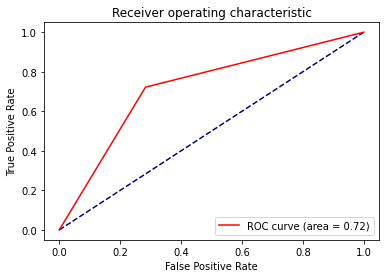

In [ ]:
# Result
printResult(y_pred_tfidf_with_stop_dt, y_prob_tfidf_with_stop_dt)

> TFIDF without Stop Words Features

In [ ]:
# Training
model.fit(tfidf_no_stop_training_features, train_data["sentiment"])

# Evaluation
y_pred_tfidf_no_stop_dt = model.predict(tfidf_no_stop_test_features)

y_prob_tfidf_no_stop_dt = model.predict_proba(tfidf_no_stop_test_features)[:,1]

Accuracy: 72.60

Confusion Matrix:
 [[3622 1371]
 [1369 3638]]
              precision    recall  f1-score   support

    negative       0.73      0.73      0.73      4993
    positive       0.73      0.73      0.73      5007

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000

Area under the ROC curve : 0.725999


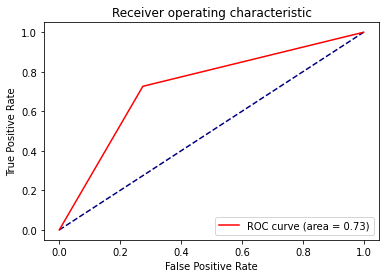

In [ ]:
# Result
printResult(y_pred_tfidf_no_stop_dt, y_prob_tfidf_no_stop_dt)

> Word2Vec with Stop Words Features

In [ ]:
# Training
model.fit(word2vec_with_stop_training_features, train_data["sentiment"])

# Evaluation
y_pred_w2v_with_stop_dt = model.predict(word2vec_with_stop_test_features)

y_prob_w2v_with_stop_dt = model.predict_proba(word2vec_with_stop_test_features)[:,1]

Accuracy: 68.84

Confusion Matrix:
 [[3442 1551]
 [1565 3442]]
              precision    recall  f1-score   support

    negative       0.69      0.69      0.69      4993
    positive       0.69      0.69      0.69      5007

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

Area under the ROC curve : 0.688401


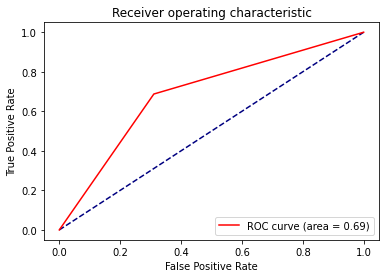

In [ ]:
# Result
printResult(y_pred_w2v_with_stop_dt, y_prob_w2v_with_stop_dt)

> Word2Vec without Stop Words Features

In [ ]:
# Training
model.fit(word2vec_no_stop_training_features, train_data["sentiment"])

# Evaluation
y_pred_w2v_no_stop_dt = model.predict(word2vec_no_stop_test_features)

y_prob_w2v_no_stop_dt = model.predict_proba(word2vec_no_stop_test_features)[:,1]

Accuracy: 73.87

Confusion Matrix:
 [[3716 1277]
 [1336 3671]]
              precision    recall  f1-score   support

    negative       0.74      0.74      0.74      4993
    positive       0.74      0.73      0.74      5007

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000

Area under the ROC curve : 0.738708


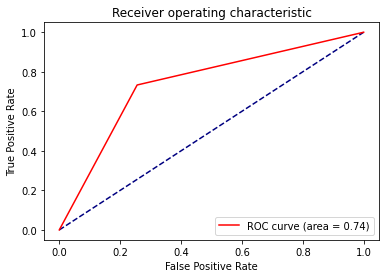

In [ ]:
# Result
printResult(y_pred_w2v_no_stop_dt, y_prob_w2v_no_stop_dt)

> BERT Sentence Version Features

In [ ]:
# Training
model.fit(bert_sentence_training_features, train_data["sentiment"])

# Evaluation
y_pred_bert_sentences_dt = model.predict(bert_sentence_test_features)

y_prob_bert_sentences_dt = model.predict_proba(bert_sentence_test_features)[:,1]

Accuracy: 78.79

Confusion Matrix:
 [[3944 1049]
 [1072 3935]]
              precision    recall  f1-score   support

    negative       0.79      0.79      0.79      4993
    positive       0.79      0.79      0.79      5007

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000

Area under the ROC curve : 0.787903


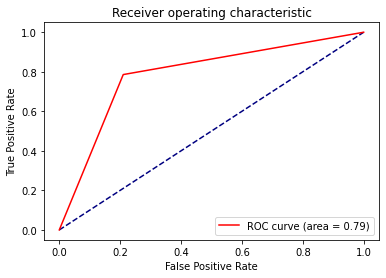

In [ ]:
# Result
printResult(y_pred_bert_sentences_dt, y_prob_bert_sentences_dt)